In [3]:
var openDigger = require('../src/open_digger');

# Example Notebook

This is an example notebook of OpenDigger to show how to use OpenDigger to analysis open source data.

## Basic functionality

## showAll

`openDigger.showAll(:repoName,:startYear=2015,:endYear=2021)` is a powerful function to show all the activity and openrank data in between `startYear` and `endYear` for repository `repoName`.

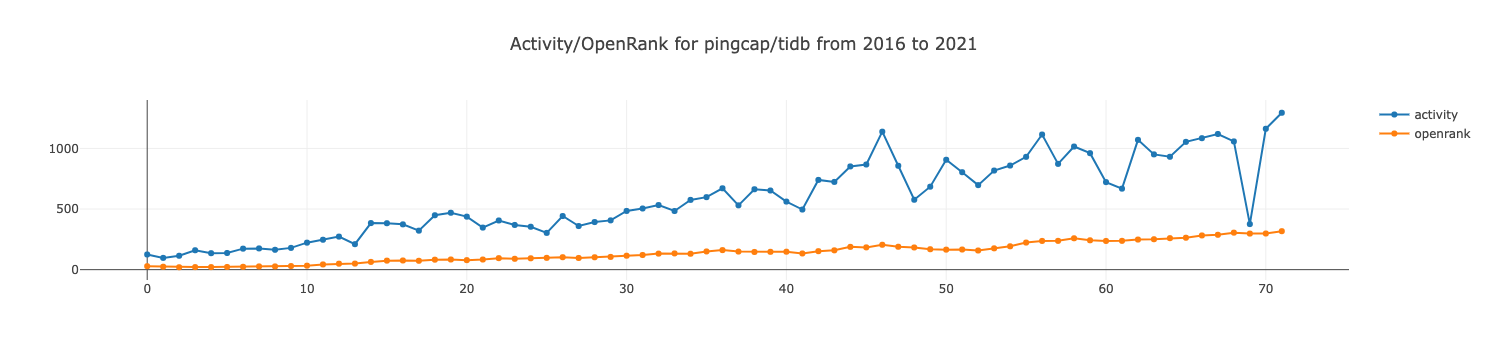

In [4]:
openDigger.showAll('pingcap/tidb', 2016);

## Advance functionality

## Drivers

In OpenDigger, we provided two drivers for users to make thier own SQL request and get data directly from the database.

### Clickhouse

Clickhouse driver is used to access the original GitHub event log data from 2015 to now.

The driver can be accessed by `openDigger.driver.clickhouse` and provide a function `query(:sql)` to query data.

And example of all log count from 2015 to 2021 shows as below.

[
  [ { count: '212221628' } ],
  [ { count: '320726236' } ],
  [ { count: '412942763' } ],
  [ { count: '479185525' } ],
  [ { count: '605544846' } ],
  [ { count: '863415606' } ],
  [ { count: '999233306' } ]
]


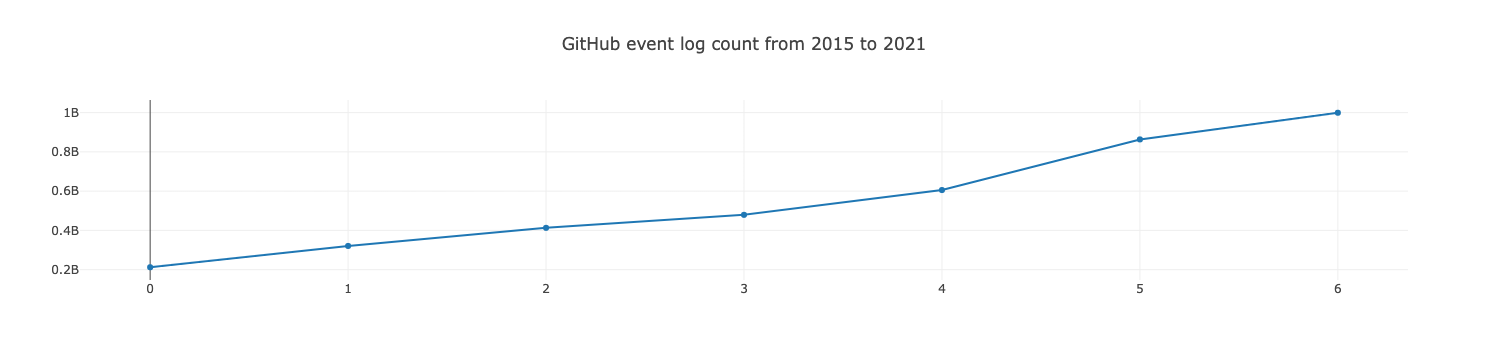

In [17]:
var startYear = 2015, endYear = 2021;
var years = [];
for (var y = startYear; y <= endYear; y++) years.push(y);
Promise.all(years.map(year => {
    return openDigger.driver.clickhouse.query(`SELECT COUNT() AS count FROM github_log.year${year}`);
})).then(data => {
    console.log(data);  // log the result to console
    openDigger.plotly([{y: data.map(d => d[0].count), mode: 'lines+markers', name: 'log_count'}], {title: `GitHub event log count from ${startYear} to ${endYear}`});  // show the result as image
});

### Neo4j

Neo4j driver is used to access the graph data with activity and openrank aggregate in month, the date range is identical with clickhouse data.

The driver can be accessed by `openDigger.driver.neo4j` and provide a function `query(:sql,:param)` to query data.

And example of `alibaba` org openrank of 2021 by every month shows as below.

[
  {
    open_rank_20211: 1378.2449947086238,
    open_rank_20212: 1205.9290687883301,
    open_rank_20213: 1198.0659094044643,
    open_rank_20214: 1309.535816358224,
    open_rank_20215: 1217.7917311759222,
    open_rank_20216: 1308.4420165438437,
    open_rank_20217: 1397.4789267862357,
    open_rank_20218: 1341.1264339608747,
    open_rank_20219: 1290.6398701659832,
    open_rank_202110: 869.2497420097089,
    open_rank_202111: 1147.450127156078,
    open_rank_202112: 1340.6250216589958
  }
]


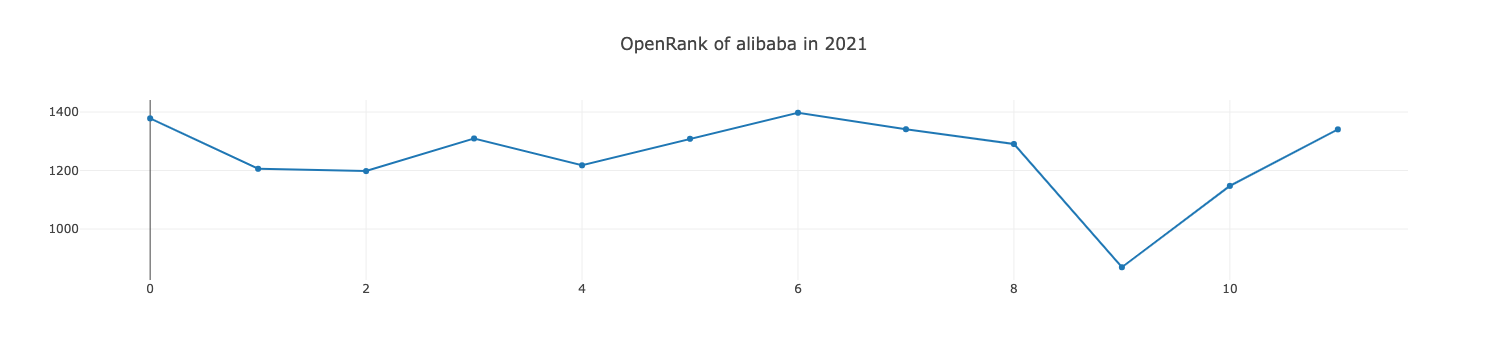

In [18]:
var startMonth = 1, endMonth = 12, org = 'alibaba';
var monthQuery = [];
for (var m = startMonth; m <= endMonth; m++) monthQuery.push(`SUM(COALESCE(r.open_rank_2021${m}, 0.0)) AS open_rank_2021${m}`);
openDigger.driver.neo4j.query(`MATCH (r:Repo) WHERE r.org_login='${org}' RETURN ${monthQuery.join(',')}`).then(data => {
    console.log(data);  // log to console
    openDigger.plotly([{y: Object.values(data[0]), mode: 'lines+markers', name: 'open_rank'}], {title: `OpenRank of ${org} in 2021`});  // show the result as image
});